Brief:

Problem statement
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

Example project idea
As a lecturer I might pick the real-world phenomenon of the performance of students
studying a ten-credit module. After some research, I decide that the most interesting
variable related to this is the mark a student receives in the module - this is going to be
one of my variables (grade).
Upon investigation of the problem, I find that the number of hours on average a
student studies per week (hours), the number of times they log onto Moodle in the
first three weeks of term (logins), and their previous level of degree qualification (qual)
are closely related to grade. The hours and grade variables will be non-negative real
number with two decimal places, logins will be a non-zero integer and qual will be a
categorical variable with four possible values: none, bachelors, masters, or phd.
After some online research, I find that full-time post-graduate students study on average four hours per week with a standard deviation of a quarter of an hour and that
a normal distribution is an acceptable model of such a variable. Likewise, I investigate
the other four variables, and I also look at the relationships between the variables. I
devise an algorithm (or method) to generate such a data set, simulating values of the
four variables for two-hundred students. I detail all this work in my notebook, and then
I add some code in to generate a data set with those properties.

# 2. Our Real World Phenomenon

As described in the introduction section, in this task we are going to base our synthesised data on existing real life data sets. 
The real life data sets are based on the following csv files:

* Hospital_Energy_Usage_2018.csv
* Hospital_Energy_Usage_2019.csv
* Hospital_Energy_Usage_2020.csv

Each of the csv files contains the following column heading's:

* Date - The day of which the variables are measured
* Total Daily Energy GWH - The total amoount of onsite electrical usage during that day, data gathered by contacting mrso@esb.ie, a service available to any electrical account holder. As the author is employed by the HSE access was provided to this data from 1st January 2018 to 1st October 2020. 
* maxtp - The daily maximum temperature for each date, for this excercise the values at Shannon Airport, Ireland were used and can be freely downloaded at https://www.met.ie/climate/available-data/historical-data.
* mintp - The daily maximum temperature for each date, for this excercise the values at Shannon Airport, Ireland were used and can be freely downloaded at https://www.met.ie/climate/available-data/historical-data.
* Confirmed Covid Cases - Total daily number of new covid cases. 
* Total Covid Cases - Cumulative total number of covid cases.
* Confirmed Covid Deaths -  Total daily number of new covid deaths. 
* Total Covid Deaths - Cumulative total number of covid deaths

In our data analytics using python we want to explore the affect of a global pandemic on an acute Irish Hospitals energy usage. The primary variables will be the daily energy usage compared against daily new covid cases and deaths. As weather can also be a significant energy factor this is also included to examine if there is any significant weather effects in these years. 

Our first step will be to look at our real world data and look at some key statistics we can use to generate our synthesised data. 

## 2.1 Analysis of Real Life Data Sets.

In the following section we will review and visualise our existing data sets and generate some key statistic's to create our synthesised data. Let's first read our existing csv files and get a summary of the data.

In [1]:
import pandas as pd # We import pandas so we can read our csv files.

# we define the Energy2018  data set by reading existing data described in section 2. for that year:
Energy2018 = pd.read_csv('Hospital_Energy_Usage_2018.csv', sep=',') 
# we define the Energy2019  data set by reading existing data described in section 2. for that year:
Energy2019 = pd.read_csv('Hospital_Energy_Usage_2019.csv', sep=',')
# we define the Energy2020  data set by reading existing data described in section 2. for that year:
Energy2020 = pd.read_csv('Hospital_Energy_Usage_2020.csv', sep=',')

print("Energy 2018") # Print to screen to add demarcation between data summaries for each year
print(Energy2018.describe()) # provides a summary of the statistics in the data set for each variable.
print("Energy 2019")
print(Energy2019.describe())
print("Energy 2020")
print(Energy2020.describe())

Energy 2018
       TotalDailyEnergy_GWh       maxtp       mintp  ConfirmedCovidCases  \
count            365.000000  365.000000  365.000000                365.0   
mean              66.883795   14.383014    7.203288                  0.0   
std                5.448145    5.605985    4.690315                  0.0   
min               44.649000    0.000000   -5.000000                  0.0   
25%               61.928000   10.300000    3.600000                  0.0   
50%               68.523000   13.600000    7.200000                  0.0   
75%               70.454000   17.900000   11.000000                  0.0   
max               80.846000   32.000000   16.700000                  0.0   

       TotalConfirmedCovidCases  ConfirmedCovidDeaths  TotalCovidDeaths  
count                     365.0                 365.0             365.0  
mean                        0.0                   0.0               0.0  
std                         0.0                   0.0               0.0  
min    

Have generated our summary statistic's for each year some of the key points to be noted are:

* count - number of samples is 365 days for 2018 and 2019, but only data available up to 1st of October for 2020 hence a reading of 275.
* Weather: The mean average temperature for each of the data sets is very similar for each year which seems to suggest there was no adverse weather scenarios that may 
* TotalDailyEnergy_GWh: We can see that the minimum, maximum and mean values are all higher for 2020 than previous years. This is interesting as due to local knowledge we know that the size of the hospital footprint had not grown in this time frame and also even though there was a surge in cases for Covid there was also cancellations in numerous outpatient procedures and several restrictions put in place nationwide to restrict movement of people. 
* Covid Cases/Deaths: We note that there are no values for 2018 and 2019, with first case recorded in Ireland in 2020.

Now that we have seen a summary of our real life data lets visualise this in plots below. First we are going to convert the date column in a readable format for pandas pd.to_datetime function below:

In [2]:
Energy2018['datetime'] = pd.to_datetime(Energy2018['Date']) # converts the date column into datetime format for pandas to read as a date field
Energy2019['datetime'] = pd.to_datetime(Energy2019['Date'])
Energy2020['datetime'] = pd.to_datetime(Energy2020['Date'])

Now after applying the datetime function lets look at our energy usage, weather data and Covid 19 data, this can be later used to compare to our synthesised data.

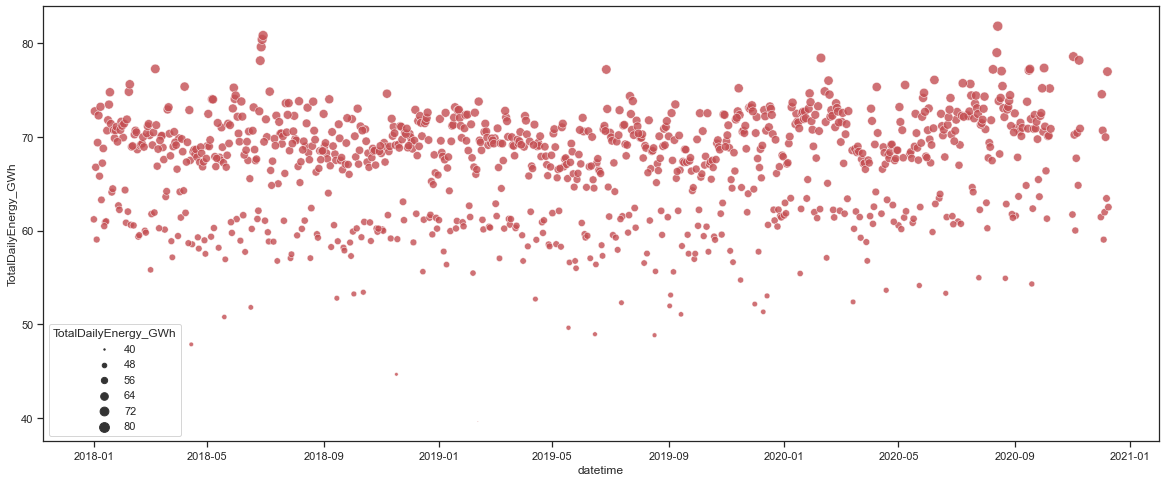

In [36]:
# Total Daily Energy Plot

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 
import numpy as np 
import pandas as pd
import datetime # for reading date timeseries data
#plt.style.use("ggplot") # A nicer style to use for plots
plt.rcParams["figure.figsize"] = (20,8) #sets the plots size
sns.set_theme(style="ticks")


# In order to generate our total daily energy over the years we will first combine data using pd.concat function:
CombinedData = pd.concat([Energy2018, Energy2019, Energy2020])

TotalDailyEnergyPlot = sns.scatterplot(x="datetime", y="TotalDailyEnergy_GWh", size="TotalDailyEnergy_GWh", sizes=(1, 100), alpha=.8, data=CombinedData[0:], color='r')
# We then create a scatter plot with x-axis as date and y as Total Daily Energy
# We based the size of the dots based on the amount of energy using the field 1-100, alpha of 0.8 and colour red.

We can see that the daily energy is consistent throughout each year, it also seems to represent the reduction in energy during the weekends. It can be interpreted also that the energy usage appears to be more based on use of hospital equipment than weather impact as the electricity usage does not appear to be seasonal. We can see a growing trend in 2020 which relates to the timing of the Covid Virus. 

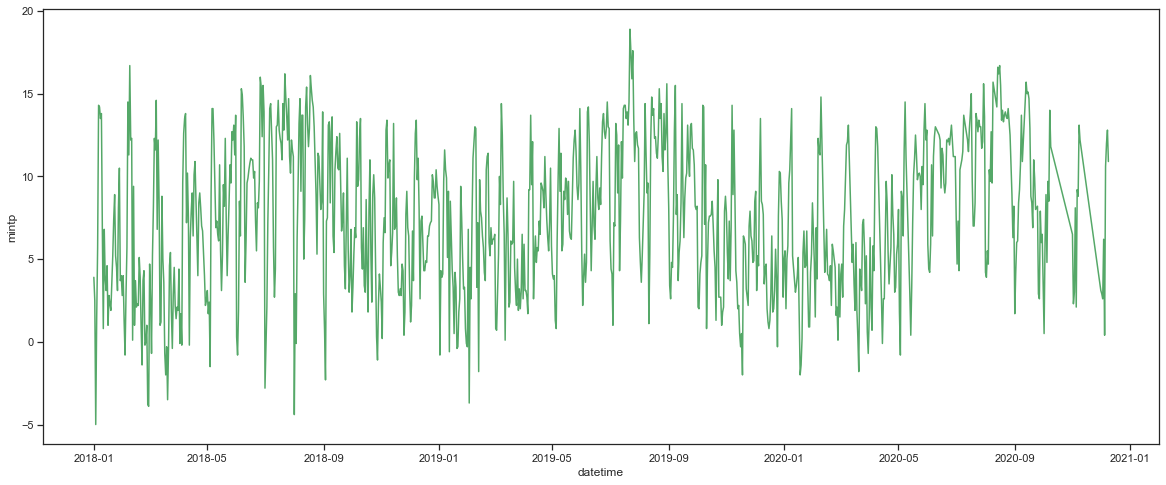

In [37]:
DailyWeatherPlot = sns.lineplot(x="datetime", y="mintp", data=CombinedData[0:], color='g')

Following our statistical analysis of our weather data, our lineplot also verifies that the weather patterns are quite consistent from 2018-2020 with no major abnormals identified. 
Finally lets look at our annual Covid Cases for 2020 for the real life data set:

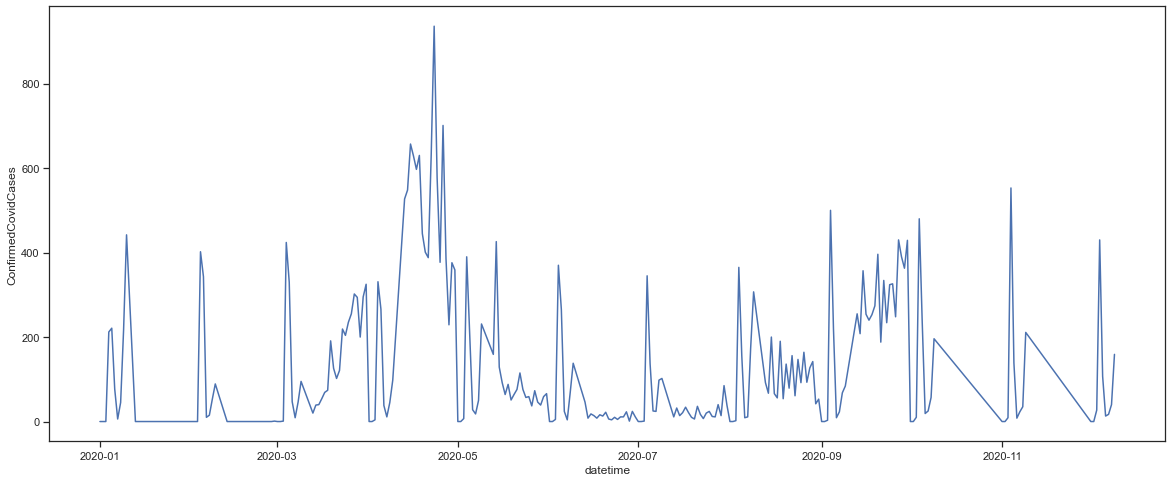

In [38]:
DailyCovidCasesPlot=sns.lineplot(x="datetime", y="ConfirmedCovidCases", data=Energy2020[0:], color='b')

We can see that our cases spiked around April in 2020 and then the cases reduced throughout the summer months before hitting a second wave near end of August 2020. 
Having presented our real life data and briefly summarised key statistics of the datasets, we will know look to create our synthesised datasets based on our real life data.

In [39]:
DailyCovidCases = Energy2020["ConfirmedCovidCases"]
DailyEnergy2020 = Energy2020["TotalDailyEnergy_GWh"]

coeffs = np.polyfit(DailyCovidCases, DailyEnergy2020, 1)
coeffs

array([-5.76440416e-03,  6.92192099e+01])

# 3. Creating our Synthesised Data

Having reviewed our real life data above, in the following sections we will create our synthesised datasets and compare with original.

## 3.1 Creating Synthesised Data

In [50]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 

In [51]:
# Creating the Date's for 2018:
start2018 = datetime.datetime(2018, 1, 1)
end2018 = datetime.datetime(2018, 12, 31)
dates2018 = pd.date_range(start2018, end2018, freq='d')

# Creating the Date's for 2019:
start2019 = datetime.datetime(2019, 1, 1)
end2019 = datetime.datetime(2019, 12, 31)
dates2019 = pd.date_range(start2019, end2019, freq='d')

# Creating the Date's for 2020:
start2020 = datetime.datetime(2020, 1, 1)
end2020 = datetime.datetime(2020, 12, 30) # leap year so we ignore last day to keep all arrays same size
dates2020 = pd.date_range(start2020, end2020, freq='d')

In [52]:
# Creating the Covid Cases
np.random.seed(1)
synCovidDailyCases2020 = np.random.randint(450, size=365)
synCovidDailyCases2018 = np.random.normal(loc=0, scale=0, size=365)
synCovidDailyCases2019 = np.random.normal(loc=0, scale=0, size=365)
print(synCovidDailyCases2020)
synTotal2020CovidCases = np.sum(synCovidDailyCases2020)
print('Total number of Covid Cases in 2020 is', synTotal2020CovidCases)

[ 37 235 396  72 255 393 203 133 335 448 144 129  71 237 390 281 178 276
 254 357 402 395 252 156 413 398  50  68 215 241 352  86 141 393   7 319
 317  22 313   1 384 316 209 264 216 141 115 431 121  30  71 387 405  49
 313   3 280  43  76  26 308 336 109 371 297  15  64 196  25 367 226 391
 282 153 104  22 265 195 126 279 381 356 155 421 313  83 166 136 288 418
 266 279 143 239  87 281 243 348  74 190 302 416 216 151 183 321 369 333
 259 384 253 262  52   2  76 149 203 263  77 200  75 332  43  20  30  36
 359 263 301  57 240 210  96 269  10 279 380 337 391 377 152 202 148 416
 140 193  94  60 152 338 371 353 130 220 103 354 266 182 352 338 198 194
 327 176  54  15 389 401 170  20 118 432 278 397 114  97 181 340  10  96
 183 317  56 217 405 231  96  25 398 141 212 116 299 134 205 184 443 399
  24 137 199 309 325 420 357 248  21 296  77 219 177 369 303 424  45 343
 144 412 234  45 372 322 302 384 413  63 331  35 437  33 130  83  48 310
 288 253 156  55 210 287  28 222 330 136 109  99  3

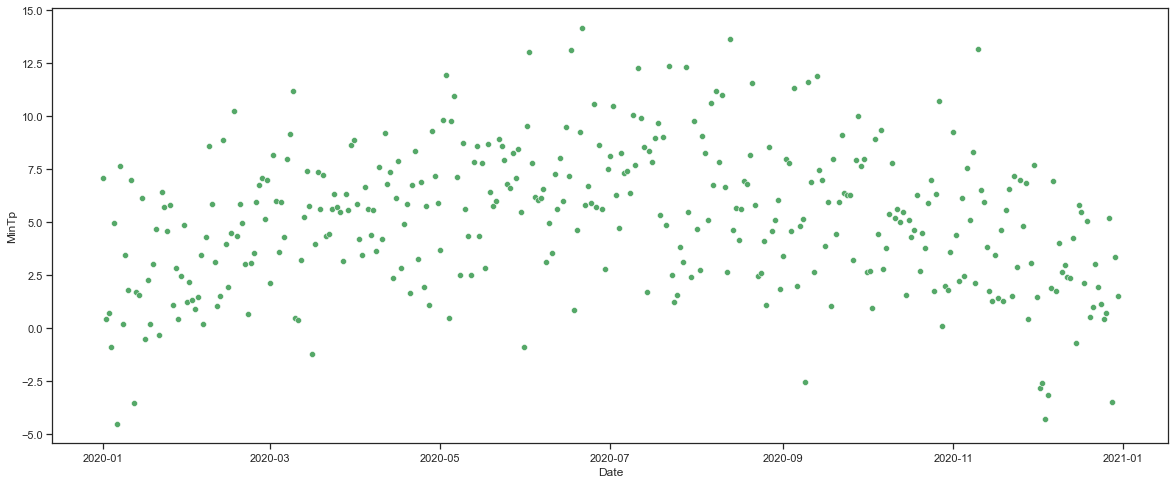

In [53]:
# Creating the Weather Data
np.random.seed(1)
t_range = 4.383604 # our range
#t_mean = 7.902182  # our mean
t_min = -5.0

synMintp2020 = np.sin(np.arange(365)/365 * math.pi)*t_range + t_min
#synMintp2020 = np.sin(np.arange(365)/365 * math.pi)*t_range + t_mean
synMintp2020 += np.random.normal(loc=7.203288, scale=3, size=365)

syn2020MintpData = pd.DataFrame({'Date': dates2020, 'MinTp': synMintp2020})
sns.scatterplot(x="Date", y='MinTp', data=syn2020MintpData[0:], color='g')

In [153]:
# Creating the Energy for 2018:
np.random.seed(3)
synEne2018 = np.random.normal(loc=66.883795, scale=5.448145, size=365)
syn2018EnergyDict = pd.DataFrame({'Date': dates2018, 'TotalDailyEnergy_GWh': synEne2018})
# Creating the Energy for 2019:
synEne2019 = np.random.normal(loc=66.090044, scale=5.620020, size=365)
syn2019EnergyDict = pd.DataFrame({'Date': dates2019, 'TotalDailyEnergy_GWh': synEne2019})
# Creating the Energy for 2020:
synEne2020 = synEne2019 *  1.0 + (synCovidDailyCases2020 * 0.03) - synMintp2020
# synEne2020 = synEne2019 *  1.05 + (synCovidDailyCases2020 * 0.01)
syn2020EnergyDict = pd.DataFrame({'Date': dates2020, 'TotalDailyEnergy_GWh': synEne2020})
# Creating a combined Energy Set
synCombinedData = pd.concat([syn2018EnergyDict, syn2019EnergyDict, syn2020EnergyDict])
#synTotalDailyEnergyPlot = sns.scatterplot(x="Date", y="TotalDailyEnergy_GWh", size="TotalDailyEnergy_GWh", sizes=(1, 100), alpha=.8, data=synCombinedData[0:], color='r')
#plt.show()

## 3.2 Comparison to Original Data

**Comparison to Covid Cases**

In [45]:
synCovidCases2020Data = pd.DataFrame({'Date': dates2020, 'ConfirmedCovidCases': synCovidDailyCases2020})
synCovidCases2020Data['datetime'] = pd.to_datetime(synCovidCases2020Data['Date']) # converts the date column into datetime format for pandas to read as a date field
print(synCovidCases2020Data)
('Total simulated number of Covid Cases in 2020 is', synTotal2020CovidCases)

          Date  ConfirmedCovidCases   datetime
0   2020-01-01                   37 2020-01-01
1   2020-01-02                  235 2020-01-02
2   2020-01-03                  396 2020-01-03
3   2020-01-04                   72 2020-01-04
4   2020-01-05                  255 2020-01-05
..         ...                  ...        ...
360 2020-12-26                  332 2020-12-26
361 2020-12-27                   12 2020-12-27
362 2020-12-28                  376 2020-12-28
363 2020-12-29                  315 2020-12-29
364 2020-12-30                  410 2020-12-30

[365 rows x 3 columns]


('Total simulated number of Covid Cases in 2020 is', 80227)

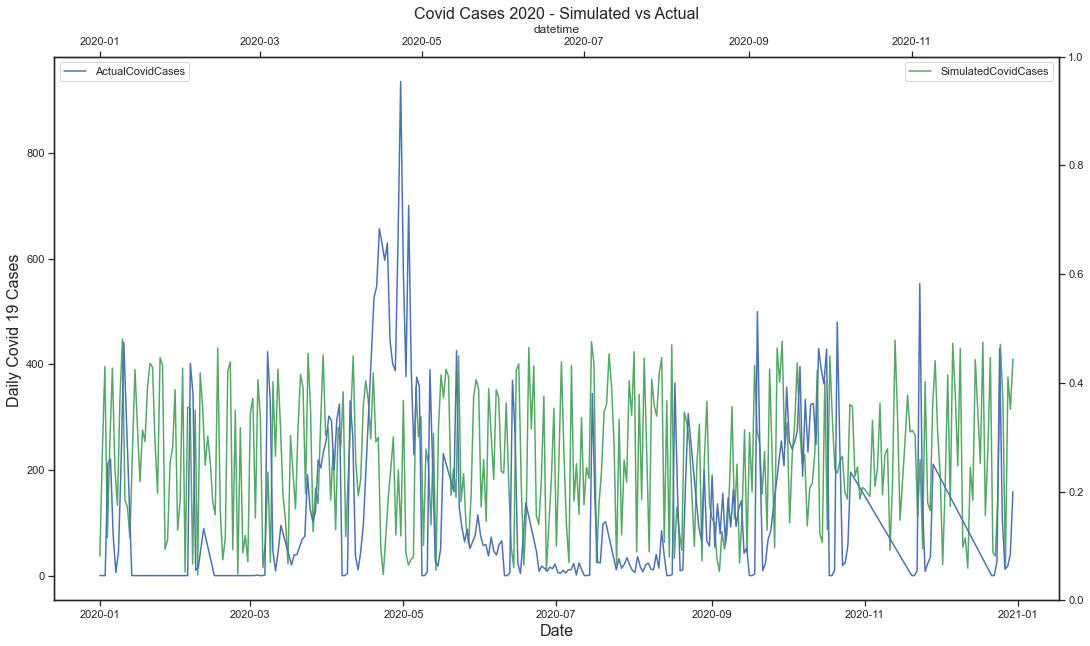

In [158]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(18,10))
#line plot creation
ax1.set_title('Covid Cases 2020 - Simulated vs Actual', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Daily Covid 19 Cases ', fontsize=16)
ax1 = sns.lineplot(x='datetime', y='ConfirmedCovidCases', data=synCovidCases2020Data, color='g', label="SimulatedCovidCases") 
#specify we want to share the same x-axis
ax2 = ax1.twinx()
ax2 = ax1.twiny()
#line plot creation
ax2 = sns.lineplot(x='datetime', y='ConfirmedCovidCases', data=Energy2020[0:], color='b', label="ActualCovidCases")
#show plot
plt.legend(loc='upper left')
plt.show()

**Comparison to Weather Data**

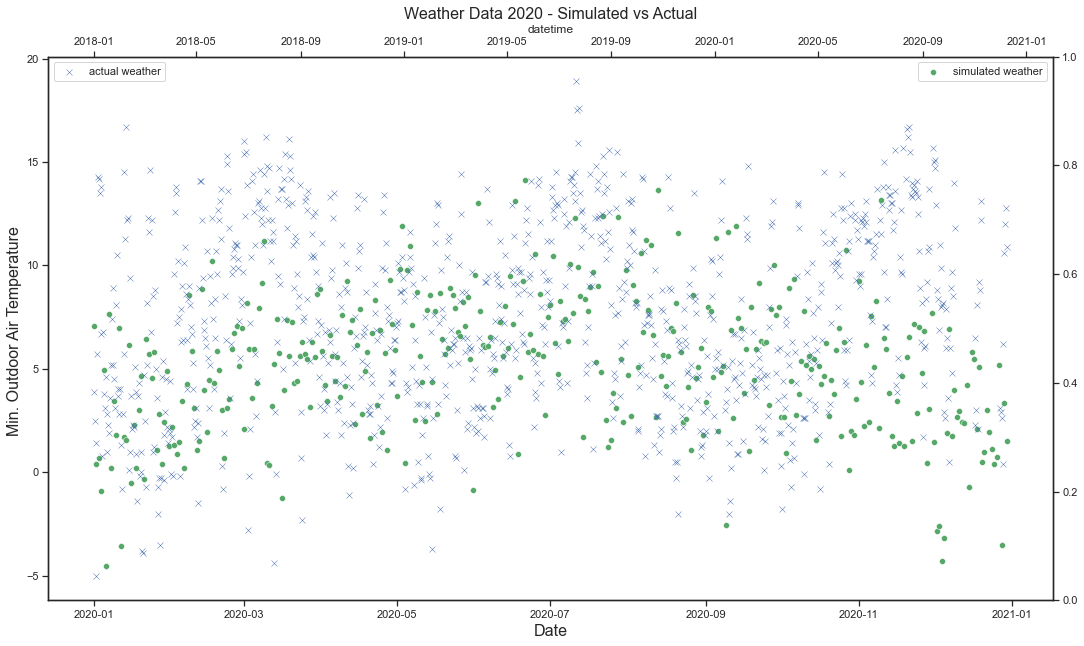

In [160]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(18,10))
#line plot creation
ax1.set_title('Weather Data 2020 - Simulated vs Actual', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Min. Outdoor Air Temperature ', fontsize=16)
ax1 = sns.scatterplot(x='Date', y='MinTp', data=syn2020MintpData[0:], color='g', label='simulated weather') 
#specify we want to share the same x-axis
ax2 = ax1.twinx()
ax2 = ax1.twiny()
#line plot creation
ax2 = sns.scatterplot(x='datetime', y='mintp', data=CombinedData[0:], color='b', marker="x", label='actual weather')
#show plot
plt.legend(loc='upper left')
plt.show()

**Comparison to Energy Data**

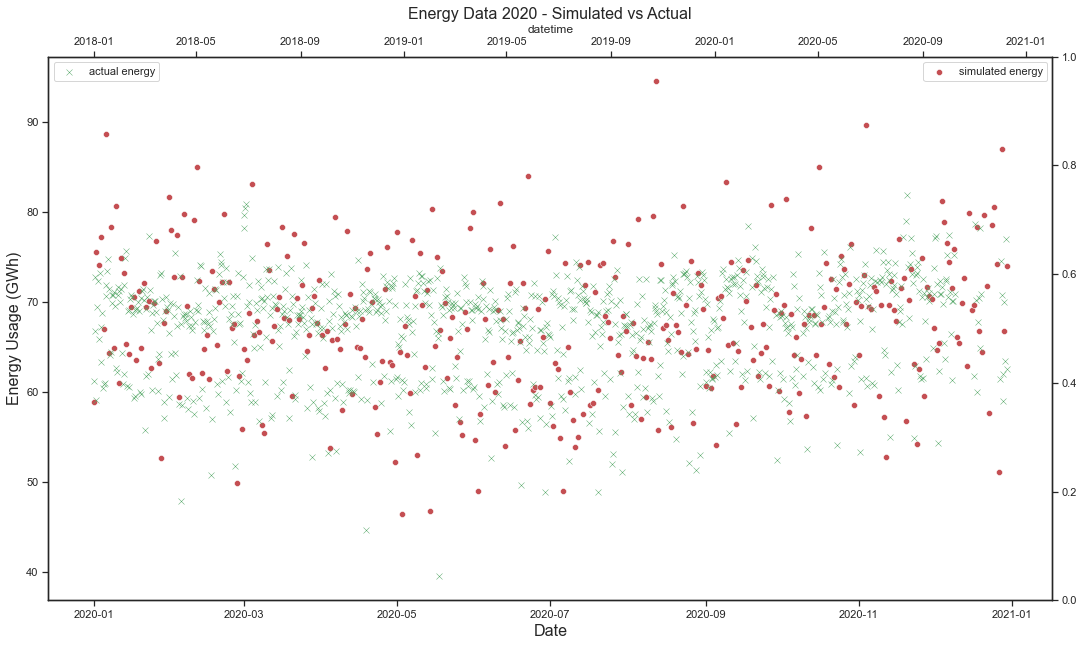

In [161]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(18,10))
#line plot creation
ax1.set_title('Energy Data 2020 - Simulated vs Actual', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Energy Usage (GWh)', fontsize=16)
ax1 = sns.scatterplot(x='Date', y='TotalDailyEnergy_GWh', data=syn2020EnergyDict[0:], color='r', label='simulated energy') 
#specify we want to share the same x-axis
ax2 = ax1.twinx()
ax2 = ax1.twiny()
#line plot creation
ax2 = sns.scatterplot(x='datetime', y='TotalDailyEnergy_GWh', data=CombinedData[0:], color='g', marker='x', label='actual energy')
#show plot
plt.legend(loc='upper left')
plt.show()

# 4. Analysis of the Synthesised Data Set

Summary of the Data Sets



**Energy Comparison 2018 to 2020**

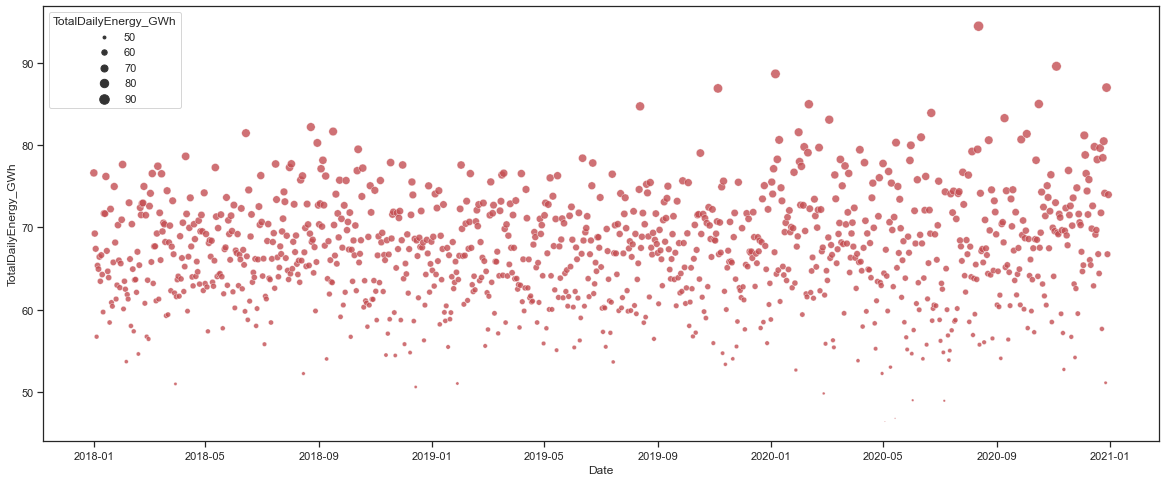

In [154]:
synTotalDailyEnergyPlot = sns.scatterplot(x="Date", y="TotalDailyEnergy_GWh", size="TotalDailyEnergy_GWh", sizes=(1, 100), alpha=.8, data=synCombinedData[0:], color='r')
plt.show()

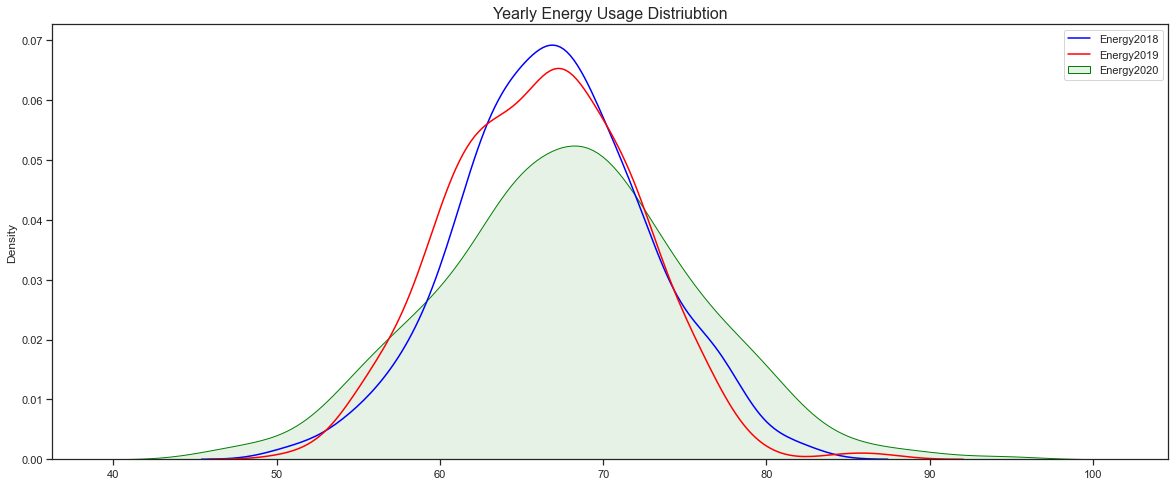

In [152]:
# Import library and dataset
import seaborn as sns

# Method 1: on the same Axis
sns.kdeplot( synEne2018, color="blue", label="Energy2018")
sns.kdeplot( synEne2019, color="red", label="Energy2019")
sns.kdeplot( synEne2020, color="green", label="Energy2020", shade=True, alpha=0.1)
plt.title('Yearly Energy Usage Distriubtion', fontsize=16)
plt.legend()

In [97]:
YearlyEnergy = pd.DataFrame({'2018': dates2018, '2019': dates2019,'2020': dates2020, 'DailyEnergy18': synEne2018, 'DailyEnergy19': synEne2019, 'DailyEnergy20': synEne2020})


**Energy Vs Covid Cases**

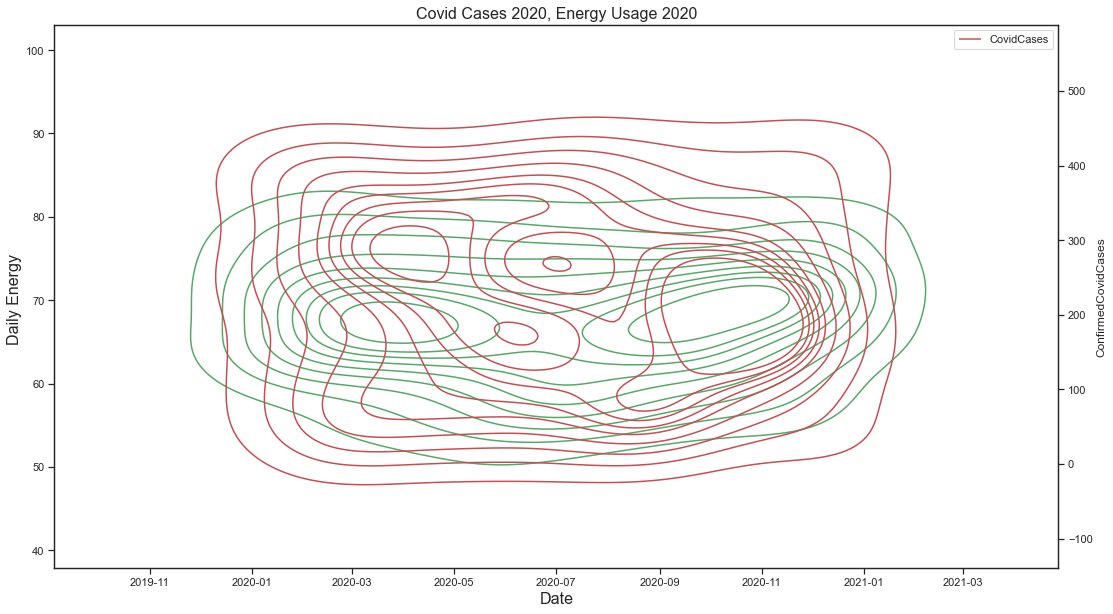

In [165]:
EnergyvsCovid = pd.DataFrame({'Date': dates2020, 'ConfirmedCovidCases': synCovidDailyCases2020, 'Daily Energy': synEne2020})
EnergyvsCovid['datetime'] = pd.to_datetime(synCovidCases2020Data['Date']) # converts the date column into datetime format for pandas to read as a date field
EnergyvsCovid

#Create combo chart
fig, ax1 = plt.subplots(figsize=(18,10))
#line plot creation
ax1.set_title('Covid Cases 2020, Energy Usage 2020', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Daily Energy ', fontsize=16)
ax1 = sns.kdeplot(x='datetime', y='Daily Energy', data=EnergyvsCovid, color='g', thresh=.1, label='Dailyenergy') 
#specify we want to share the same x-axis
ax2 = ax1.twinx()
#line plot creation
ax2 = sns.kdeplot(x='datetime', y='ConfirmedCovidCases', data=EnergyvsCovid, color='r', thresh=.1, label='CovidCases')
#show plot
plt.legend()
plt.show()

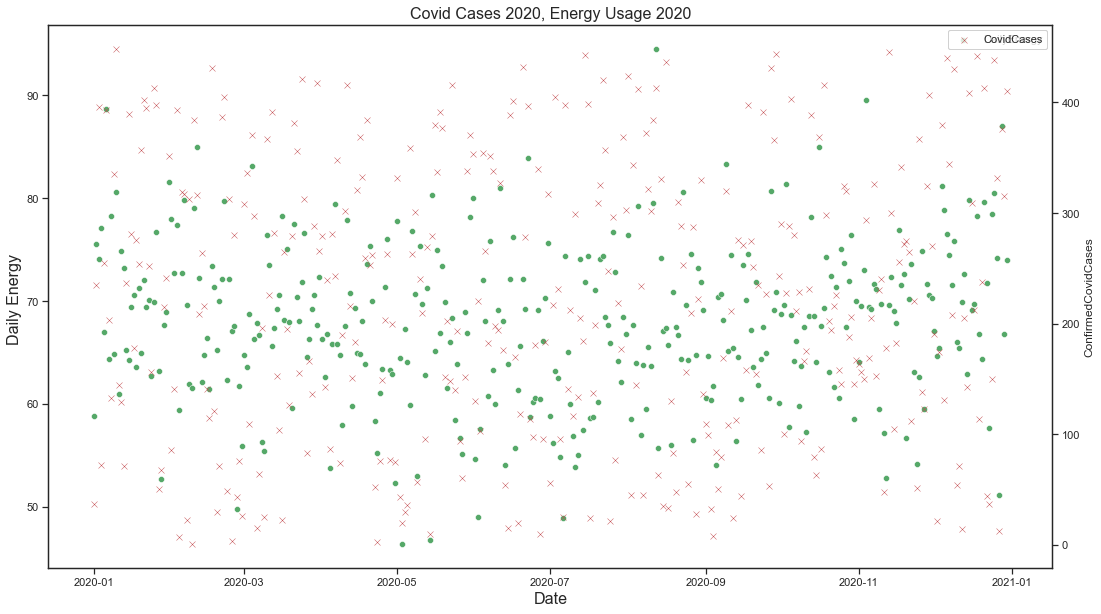

In [168]:
EnergyvsCovid = pd.DataFrame({'Date': dates2020, 'ConfirmedCovidCases': synCovidDailyCases2020, 'Daily Energy': synEne2020})
EnergyvsCovid['datetime'] = pd.to_datetime(synCovidCases2020Data['Date']) # converts the date column into datetime format for pandas to read as a date field
EnergyvsCovid

#Create combo chart
fig, ax1 = plt.subplots(figsize=(18,10))
#line plot creation
ax1.set_title('Covid Cases 2020, Energy Usage 2020', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Daily Energy ', fontsize=16)
ax1 = sns.scatterplot(x='datetime', y='Daily Energy', data=EnergyvsCovid, color='g', label='DailyEnergy') 
#specify we want to share the same x-axis
ax2 = ax1.twinx()
#line plot creation
ax2 = sns.scatterplot(x='datetime', y='ConfirmedCovidCases', data=EnergyvsCovid, color='r', marker='x', label='CovidCases')
#show plot
plt.legend()
plt.show()

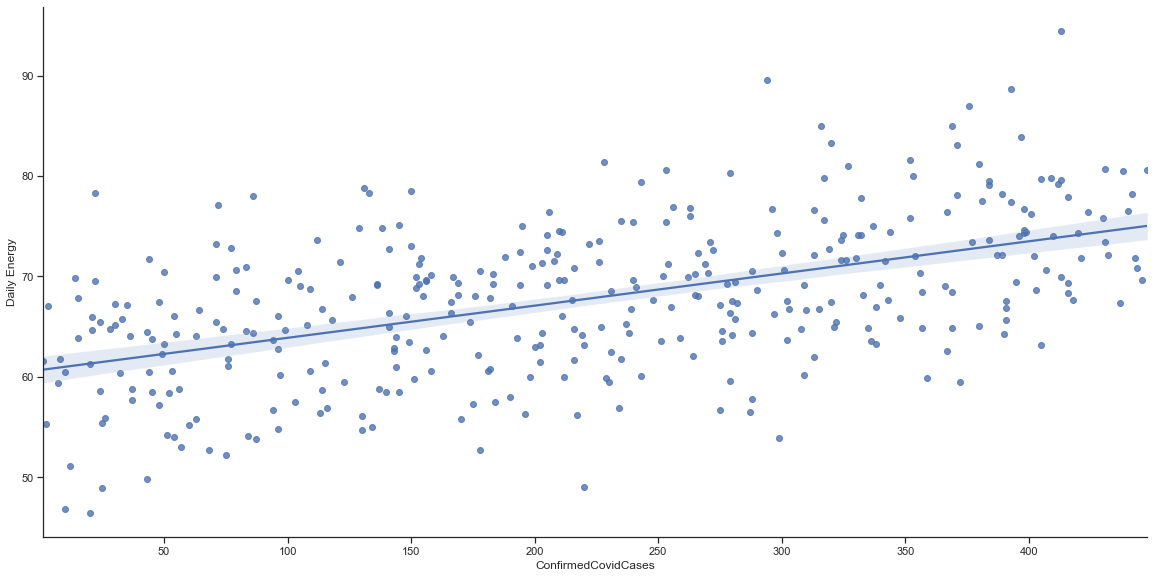

In [88]:
EnergyvsCovid = pd.DataFrame({'Date': dates2020, 'ConfirmedCovidCases': synCovidDailyCases2020, 'Daily Energy': synEne2020})
EnergyvsCovid['datetime'] = pd.to_datetime(synCovidCases2020Data['Date']) # converts the date column into datetime format for pandas to read as a date field
EnergyvsCovid
plt.rcParams["figure.figsize"] = (20,8) #sets the plots size
sns.lmplot(x="ConfirmedCovidCases", y="Daily Energy", data=EnergyvsCovid, height=8, aspect=2)

Energy vs Weather

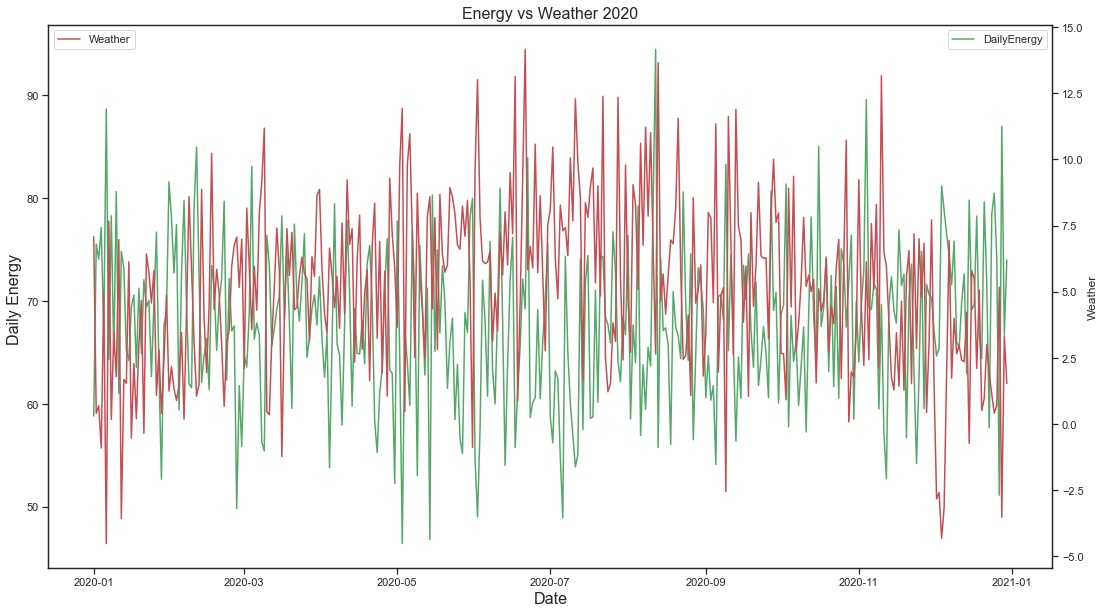

In [180]:
#Energy vs Weather
EnergyvsWeather = pd.DataFrame({'Date': dates2020, 'Weather': synMintp2020,'Daily Energy': synEne2020})
EnergyvsWeather['datetime'] = pd.to_datetime(EnergyvsWeather['Date']) # converts the date column into datetime format for pandas to read as a date field

#Create combo chart
fig, ax1 = plt.subplots(figsize=(18,10))
#line plot creation
ax1.set_title('Energy vs Weather 2020', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Daily Energy ', fontsize=16)
ax1 = sns.lineplot(x='datetime', y='Daily Energy', data=EnergyvsWeather, color='g', label='DailyEnergy') 
#specify we want to share the same x-axis
ax2 = ax1.twinx()
#line plot creation
ax2 = sns.lineplot(x='datetime', y='Weather', data=EnergyvsWeather, color='r', label='Weather')
#show plot
plt.legend(loc='upper left')
plt.show()

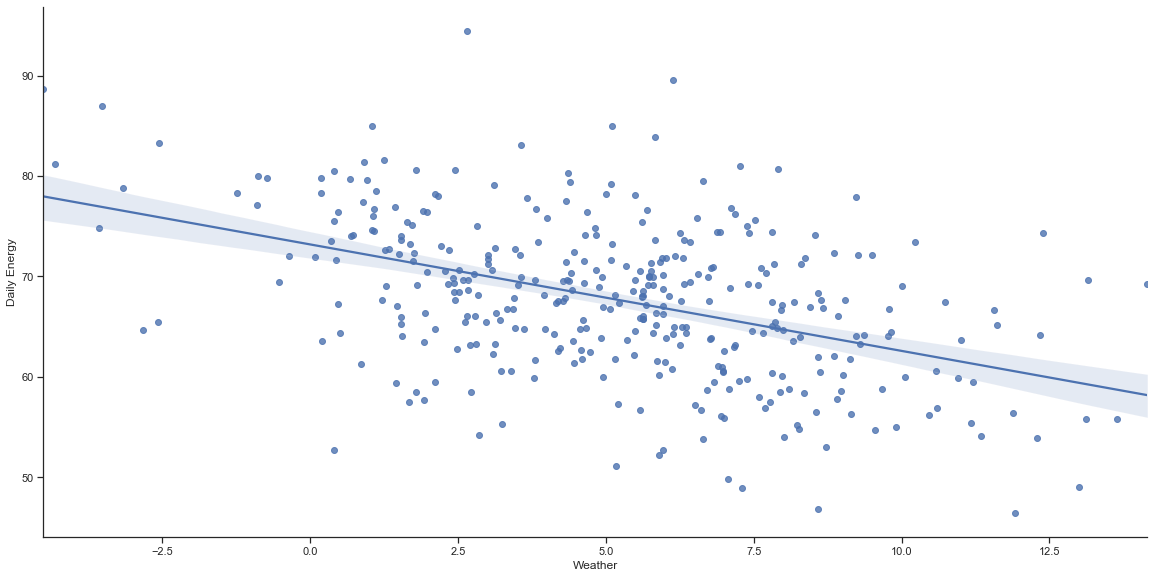

In [178]:
WeatherEnergyRelationship=sns.lmplot(x="Weather", y="Daily Energy", data=EnergyvsWeather, height=8, aspect=2)
plt.show()

**Covid vs Weather**

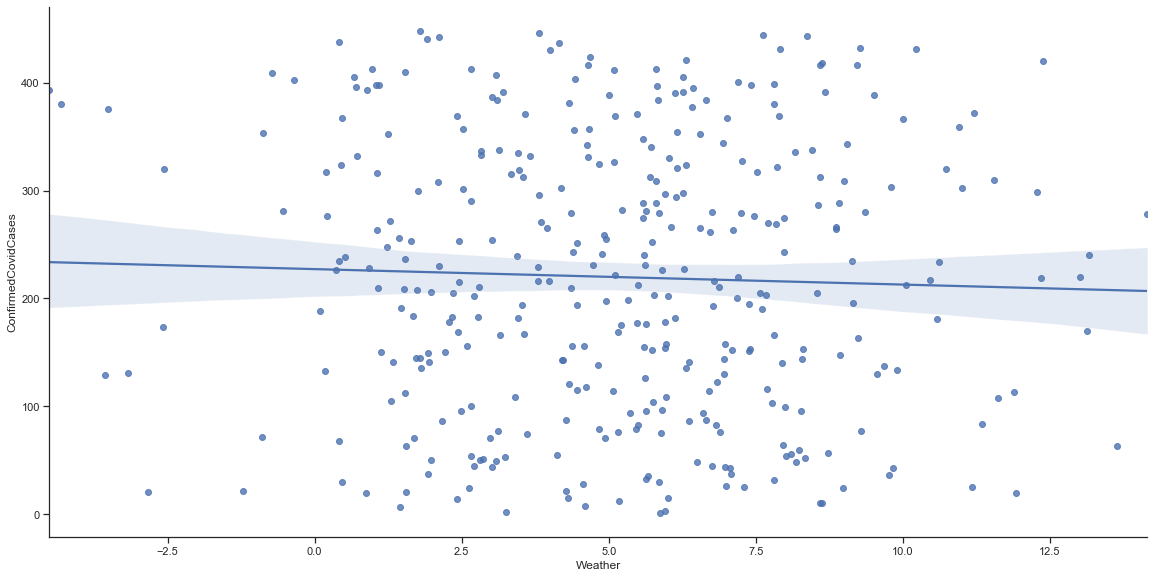

In [183]:
CovidvsWeather = pd.DataFrame({'Date': dates2020, 'Weather': synMintp2020,'ConfirmedCovidCases': synCovidDailyCases2020})
CovidvsWeather['datetime'] = pd.to_datetime(CovidvsWeather['Date']) # converts the date column into datetime format for pandas to read as a date field

WeatherCovidRelationship=sns.lmplot(x="Weather", y="ConfirmedCovidCases", data=CovidvsWeather, height=8, aspect=2)
plt.show()

**References**

https://docs.python.org/3/library/datetime.html
https://www.met.ie/climate/available-data/historical-data
https://data.gov.ie/dataset/covidstatisticsprofilehpscirelandopendata1/resource/2bf52086-d76c-42b2-91f6-b99ec5952173
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html
https://en.wikipedia.org/wiki/Sine